## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
print(df.columns.tolist())


['Area Category', 'Nama Daerah', 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']


In [4]:
# rename column
df = df.rename(columns={
    'Harga Penawaran (dari Owner)': 'HargaPenawaran',
    'Luas Tanah (m2)': 'LuasTanah',
    'Luas Bangunan (m2)': 'LuasBangunan',
    'Jumlah Kamar Mandi': 'KamarMandi',
    'Jumlah Kamar': 'KamarTidur',
    'Tingkat/Lantai ': 'Tingkat'
})
df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,KamarTidur,KamarMandi,Tingkat,HargaPenawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [5]:
# describe data
df.describe()

,LuasTanah,LuasBangunan,KamarTidur,KamarMandi,Tingkat,HargaPenawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [6]:
# check missing value

df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
LuasTanah,0
LuasBangunan,0
KamarTidur,0
KamarMandi,0
Tingkat,0
HargaPenawaran,0
Terjual/Belum,0
Arah Hadap Rumah,0


In [7]:
# check unique value

for col in df.columns:
    print(f"{col}:", df[col].nunique(), "unique values")


Area Category: 4 unique values
Nama Daerah: 126 unique values
LuasTanah: 141 unique values
LuasBangunan: 125 unique values
KamarTidur: 10 unique values
KamarMandi: 9 unique values
Tingkat: 4 unique values
HargaPenawaran: 171 unique values
Terjual/Belum: 1 unique values
Arah Hadap Rumah: 4 unique values
Posisi Rumah: 5 unique values
Lebar Jalan Depan Rumah (ROW): 3 unique values


In [8]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   LuasTanah                      308 non-null    int64 
 3   LuasBangunan                   308 non-null    int64 
 4   KamarTidur                     308 non-null    int64 
 5   KamarMandi                     308 non-null    int64 
 6   Tingkat                        308 non-null    int64 
 7   HargaPenawaran                 308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [9]:
# drop column
df = df.drop(columns=['Terjual/Belum', 'Arah Hadap Rumah',
                      'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'])

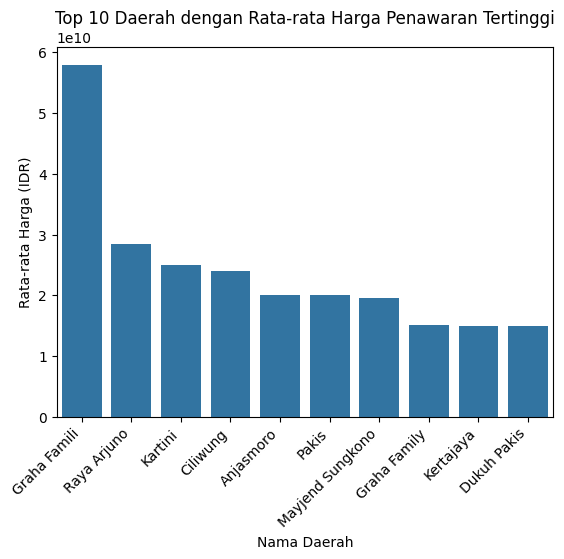

In [10]:
# hitung rata-rata harga per daerah
avg_price = df.groupby('Nama Daerah')['HargaPenawaran'].mean().sort_values(ascending=False).head(10)

# visualisasi hanya 10 daerah termahal
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Daerah dengan Rata-rata Harga Penawaran Tertinggi')
plt.ylabel('Rata-rata Harga (IDR)')
plt.xlabel('Nama Daerah')
plt.show()


Grafik ini menunjukkan 10 Daerah dengan rata-rata penawaran tinggi. Graha Famili memiliki rata-rata harga penawaran tertinggi, menandakan kawasan ini sebagai wilayah premium dengan properti bernilai tinggi dan berfasilitas lengkap. Disusul oleh Raya Arjuno, Kartini, dan Ciliwung yang juga memiliki harga tinggi karena faktor lokasi strategis dan nilai lahan komersial. Sementara itu, daerah seperti Anjasmoro, Pakis, dan Mayjend Sungkono mewakili segmen menengah atas dengan harga lebih stabil.

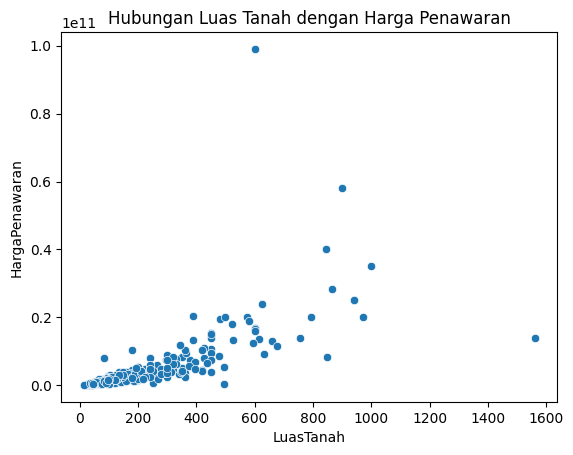

In [11]:
sns.scatterplot(x='LuasTanah', y='HargaPenawaran', data=df)
plt.title('Hubungan Luas Tanah dengan Harga Penawaran')
plt.show()


Grafik di atas menunjukkan adanya hubungan positif antara luas tanah dan harga penawaran properti, di mana semakin besar luas tanah, umumnya semakin tinggi pula harga jualnya. Pola ini menandakan bahwa luas lahan merupakan salah satu faktor utama yang memengaruhi nilai properti. Namun, terdapat beberapa titik data yang menyimpang (outlier), misalnya properti dengan harga sangat tinggi meskipun luas tanah tidak terlalu besar — hal ini kemungkinan disebabkan oleh lokasi premium atau fasilitas tambahan yang meningkatkan nilai jual. Secara keseluruhan, grafik ini mengonfirmasi bahwa ukuran lahan berbanding lurus dengan nilai ekonomi properti, tetapi faktor lokasi dan kualitas bangunan juga berperan penting.

## Data Transformation

In [12]:
# Encoding
# Initial scaler dan encoder
sc = StandardScaler()
le = LabelEncoder()

# continuous feature
num_features = ['LuasTanah', 'LuasBangunan', 'KamarTidur', 'KamarMandi', 'Tingkat', 'HargaPenawaran']

# categorical feature
cat_feature = 'Nama Daerah'

In [13]:
# SCALINGGGG
# Scaling fitur numerik
df_scaled = sc.fit_transform(df[num_features])

# Konversi ke DataFrame biar bisa digabung nanti
df_scaled = pd.DataFrame(df_scaled, columns=num_features)
# Encoding kolom Nama Daerah
df['NamaDaerah_encoded'] = le.fit_transform(df[cat_feature])
# gabung hasil scaling numerik + encoding kategori
df_combined = pd.concat([df_scaled, df['NamaDaerah_encoded']], axis=1)

print("Shape dataset akhir:", df_combined.shape)
df_combined.head()


Shape dataset akhir: (308, 7)


,LuasTanah,LuasBangunan,KamarTidur,KamarMandi,Tingkat,HargaPenawaran,NamaDaerah_encoded
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,11
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,100
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,48
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,48
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,48


In [14]:
# get stastical information on the new dataset
df_combined.describe()

,LuasTanah,LuasBangunan,KamarTidur,KamarMandi,Tingkat,HargaPenawaran,NamaDaerah_encoded
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,61.448052
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,36.863343
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,29.750000
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,63.500000
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,94.000000
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,125.000000


## Silhouette Score

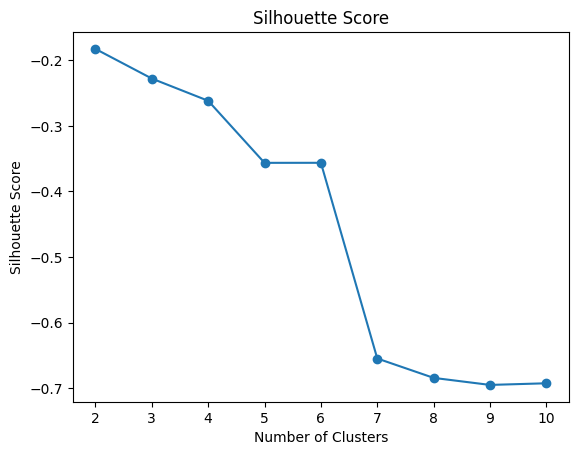

In [15]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_combined)
    silhouette_avg = silhouette_score(df_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


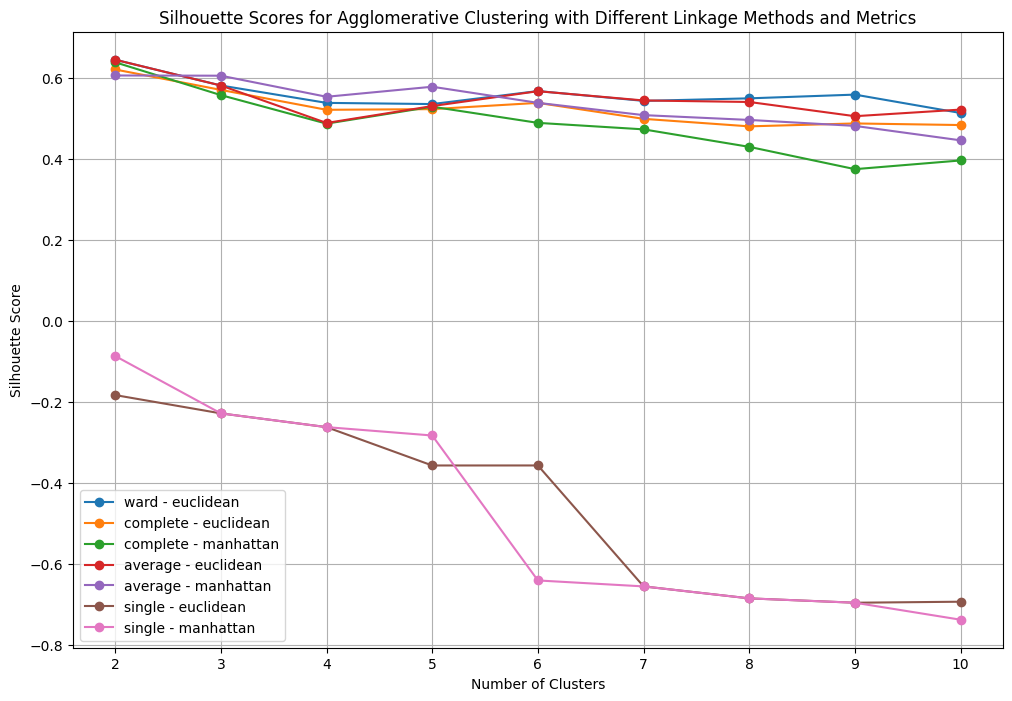

Best Silhouette Score: 0.6454022520144291
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [16]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_combined)
            silhouette_avg = silhouette_score(df_combined, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

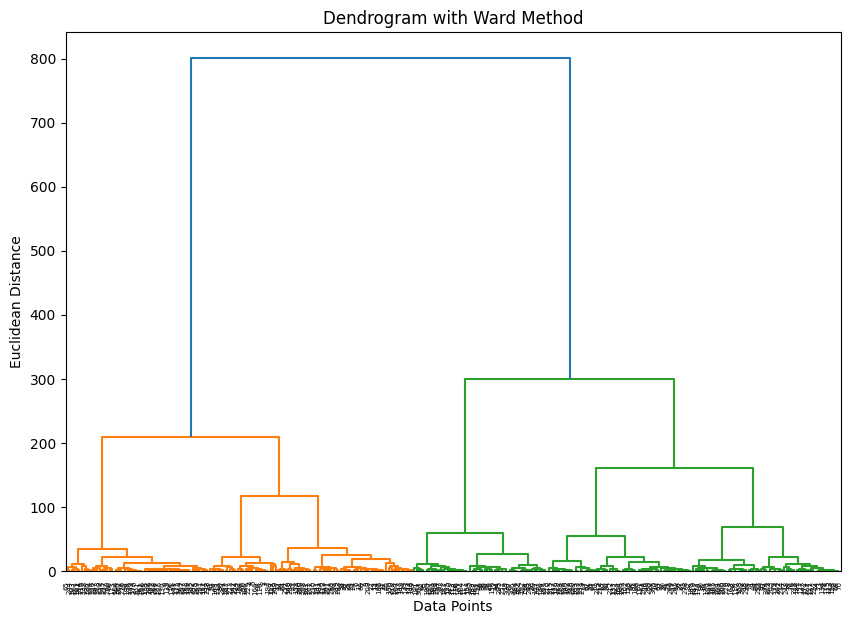

In [17]:
# Max Distance
linked = linkage(df_combined, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

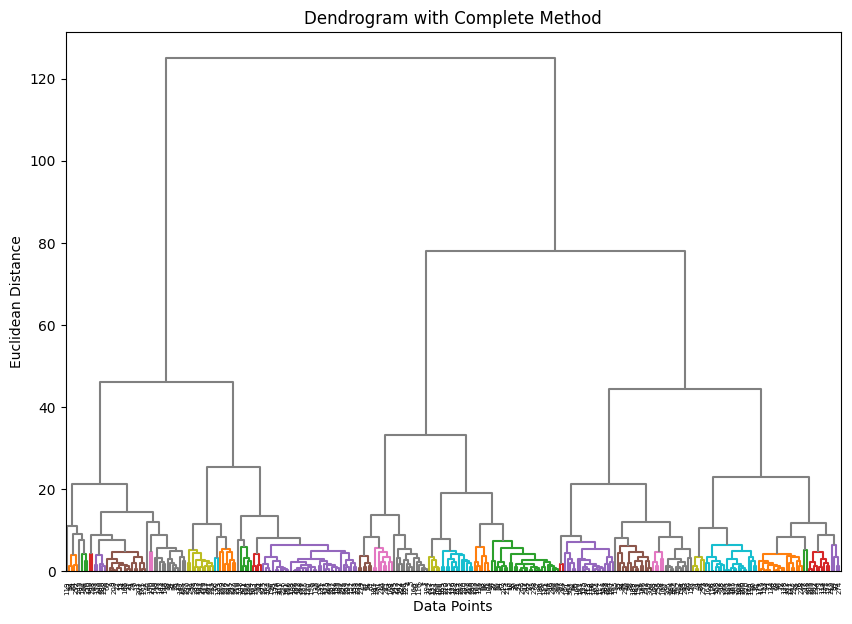

In [18]:
# Complete Method
linked = linkage(df_combined, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

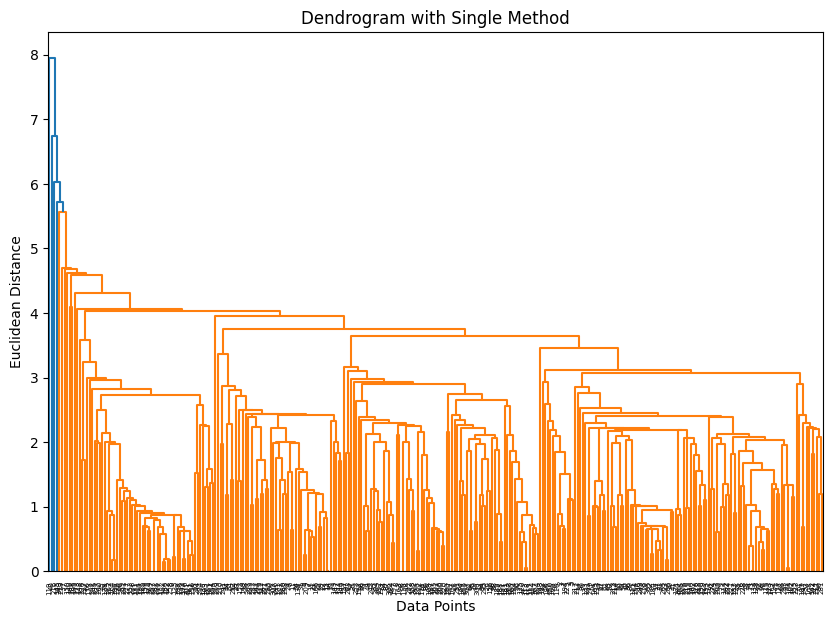

In [19]:
# Min Distance
linked = linkage(df_combined, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

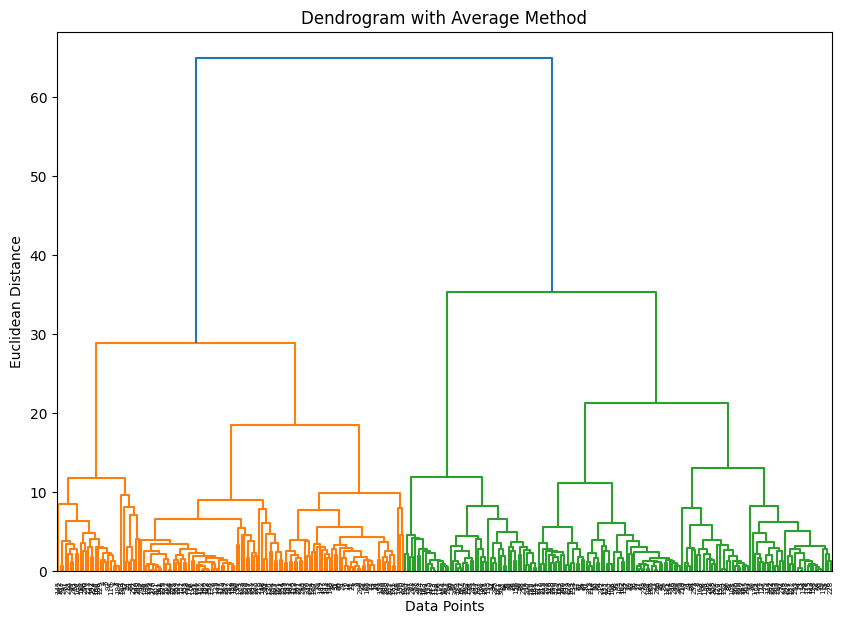

In [20]:
# Average Distance
linked = linkage(df_combined, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [21]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_combined)

# Merging Results
df['Cluster'] = y_hc

In [22]:
# Evaluation
ss = silhouette_score(df_combined, y_hc)
print(ss)

0.6454022520144291


## Dendogram Visualization for Hierarchical Clustering Model

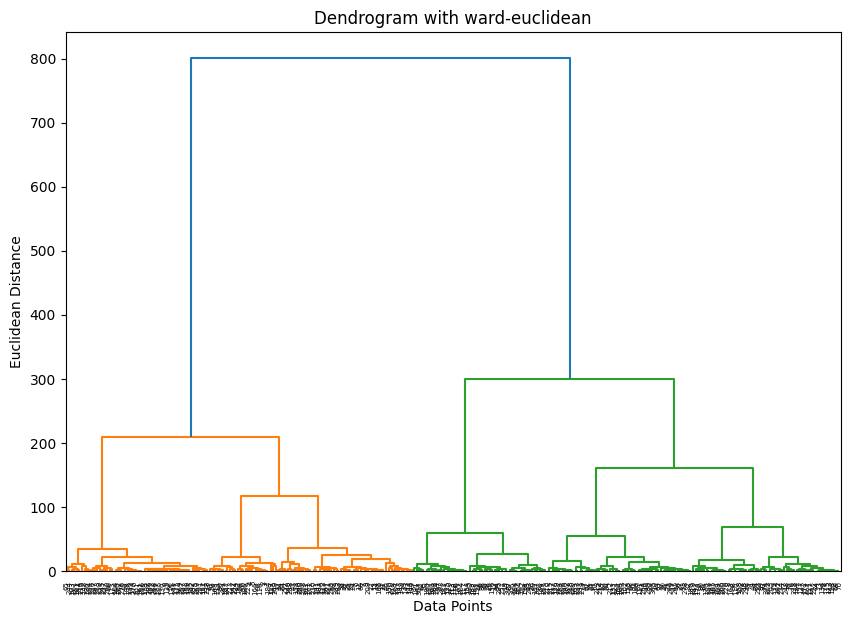

In [23]:
# Average Distance
linked = linkage(df_combined, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [24]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,KamarTidur,KamarMandi,Tingkat,HargaPenawaran,NamaDaerah_encoded,Cluster,Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,11,1,1
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,100,0,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,48,1,1
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,48,1,1
4,Premium,Kenjeran,350,600,5,5,2,5000000000,48,1,1


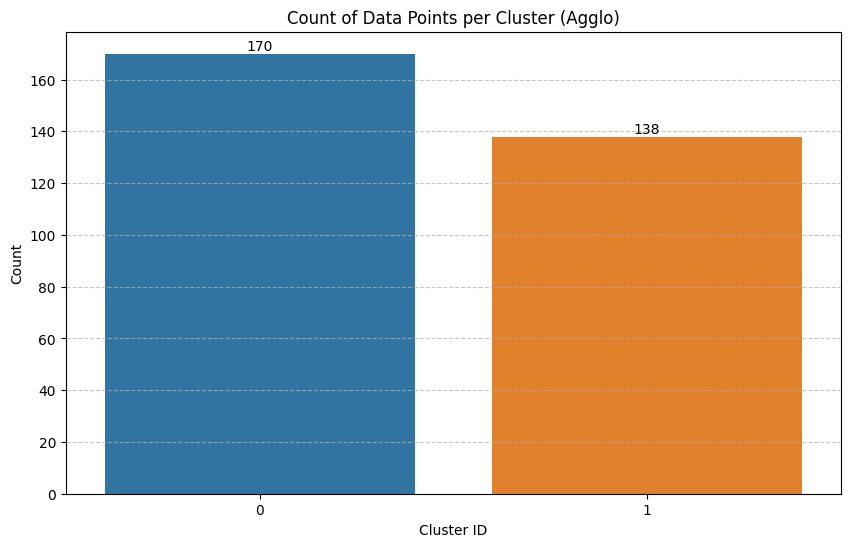

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

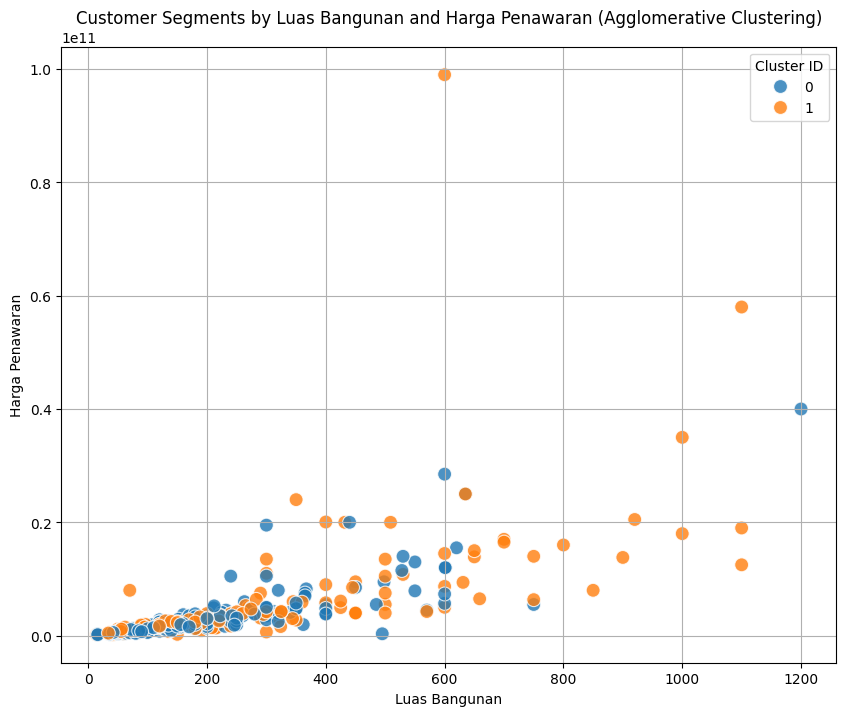

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LuasBangunan', y='HargaPenawaran', hue='Agglo', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Bangunan and Harga Penawaran (Agglomerative Clustering)')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Penawaran')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

## Statistical Summary for each cluster

In [27]:
cluster_summary = df.groupby('Cluster').agg({
    'Nama Daerah': lambda x: x.mode()[0] if not x.mode().empty else None,
    'LuasTanah': ['mean', 'median'],
    'LuasBangunan':  ['mean', 'median'],
    'KamarTidur':  ['mean', 'median'],
    'KamarMandi':  ['mean', 'median'],
    'Tingkat':  ['mean', 'median'],
    'HargaPenawaran':  ['mean', 'median'],
})
# Rename the 'first' column (used as mode) for categorical columns
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the final summary
cluster_summary.round(2)


Nama Daerah LuasTanah        LuasBangunan        KamarTidur         \
           <lambda>      mean median         mean median       mean median   
Cluster                                                                      
0         Mulyorejo    200.45  150.0       227.51  186.0       4.04    4.0   
1         Citraland    259.59  200.0       314.96  241.5       4.57    5.0   

        KamarMandi        Tingkat        HargaPenawaran                
              mean median    mean median           mean        median  
Cluster                                                                
0             3.08    3.0    1.83    2.0   3.814940e+09  2.400000e+09  
1             3.66    4.0    1.86    2.0   6.491776e+09  3.100000e+09

Implikasi Manajerial Berdasarkan Hasil Clustering

## Cluster 0 — Rumah Menengah di Daerah Mulyorejo

Profil:
Rata-rata luas tanah 200,45 m² dengan median 150 m², dan luas bangunan rata-rata 227,51 m².
Rumah dalam cluster ini memiliki 4 kamar tidur dan 3 kamar mandi, dengan rata-rata 1–2 lantai.
Harga penawaran berada di kisaran Rp 2,4–3,8 miliar.

Cluster ini merepresentasikan segmen rumah menengah atas yang berada di kawasan strategis seperti Mulyorejo.
Properti pada segmen ini umumnya menyasar keluarga mapan yang mencari keseimbangan antara luas bangunan, lokasi, dan harga yang masih relatif kompetitif untuk Surabaya Timur.
Tingginya median luas tanah menunjukkan permintaan pada rumah siap huni dengan area cukup luas namun masih dalam jangkauan pasar menengah.

Strategi:

- Tawarkan paket cicilan KPR fleksibel atau kerjasama dengan developer untuk pembelian kredit menengah.
- Gunakan iklan digital berbasis lokasi (geo-targeted ads) untuk menjangkau calon pembeli area Surabaya Timur.
- Promosikan kelebihan nilai lokasi (dekat kampus, sekolah, atau pusat bisnis) untuk meningkatkan persepsi nilai properti.
- Fokus KPI:
Waktu rata-rata penjualan, tingkat minat calon pembeli (inquiry rate), dan rasio closing deal.

## Cluster 1 — Rumah Premium di Daerah Citraland

Profil:
Rata-rata luas tanah 259,59 m² dengan median 200 m², serta luas bangunan rata-rata 314,96 m².
Rumah memiliki 4–5 kamar tidur dan 3–4 kamar mandi, rata-rata 2 lantai.
Harga penawaran jauh lebih tinggi dengan kisaran Rp 3,1–6,5 miliar, menunjukkan segmen premium housing.

Cluster ini menunjukkan kelompok properti kelas atas yang umumnya terletak di kawasan Citraland, salah satu perumahan elit di Surabaya Barat.
Konsumen pada segmen ini adalah pembeli berpenghasilan tinggi atau investor yang mencari kenyamanan, prestise, dan prospek kenaikan nilai properti.

Strategi:
- Gunakan pendekatan personalized marketing seperti private viewing atau by-invitation events untuk meningkatkan eksklusivitas.
- Kolaborasi dengan agen properti premium dan bank prioritas untuk menawarkan program investasi.
- Tekankan nilai prestise, keamanan, dan fasilitas premium (swimming pool, security, taman privat) dalam promosi.

Fokus KPI:
Average Selling Price (ASP), tingkat penjualan unit premium, dan nilai transaksi total (revenue per unit).

## Kesimpulan:

Dari hasil clustering, dapat disimpulkan bahwa pasar properti terbagi menjadi dua segmen besar:

Segmen rumah menengah strategis (Cluster 0) — berpotensi tinggi untuk pasar keluarga dan first-mover buyers.

Segmen rumah premium eksklusif (Cluster 1) — fokus pada nilai investasi dan prestise.

Keduanya memerlukan strategi pemasaran berbeda — Cluster 0 berorientasi pada volume dan aksesibilitas, sedangkan Cluster 1 berorientasi pada citra dan nilai jangka panjang.